# Setup

Dependencias: java>=11 & python>=3.8

Install java jdk 11

```bash
> apt-get install openjdk-11-jdk
```

Install python-terrier

```bash
> pip install python-terrier
```



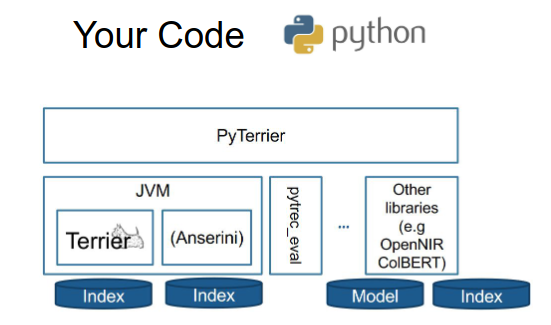

# Docs

https://pyterrier.readthedocs.io

# Usage

In [ ]:
import pandas as pd
import pyterrier as pt
if not pt.started():
  pt.init()

### Indexing

In [ ]:
files = pt.io.find_files("/home/agustin/Documentos/universidad/course/corpus/simple_terrier_TREC")
files

In [ ]:
!cat {files[0]}

In [ ]:
indexer = pt.TRECCollectionIndexer("./custom_trec_index", verbose=True, overwrite=True)
indexref = indexer.index(files)

In [ ]:
# load the index, print the statistics
index = pt.IndexFactory.of(indexref)
print(index.getCollectionStatistics().toString())

In [ ]:
for kv in index.getLexicon():
  print("%s -> %s" % (kv.getKey(), kv.getValue().toString() ) )

In [ ]:
# indexar archivos en texto plano?
# ver: pyterrier.FilesIndexer
# https://pyterrier.readthedocs.io/en/latest/terrier-indexing.html#pyterrier.FilesIndexer

### Retrieval

In [ ]:
# ad-hoc retrieval
br = pt.BatchRetrieve(index, wmodel="TF_IDF") # wmodel="BM25", properties={"termpipelines" : "Stopwords,PorterStemmer"}
results = br.search("lata")
results

In [ ]:
# batch retrieval

# define topics (queries) and qrels (relevance judgments)

topics = pd.DataFrame([["1", "casa tero"], ["2", "lata"]], columns=["qid", "query"])
qrels = pd.DataFrame([["1", "1", 2], ["1", "2", 1], ["2", "3", 1], ["2", "4", 2]], columns=["qid", "docno", "label"])

In [ ]:
topics

In [ ]:
qrels

In [ ]:
tf_idf = pt.BatchRetrieve(index, wmodel="TF_IDF")
bm25 = pt.BatchRetrieve(index, wmodel="BM25")
pt.Experiment([tf_idf, bm25], topics, qrels, eval_metrics=["map", "ndcg", "recall_3"])
# available measures: https://pyterrier.readthedocs.io/en/latest/experiments.html#available-evaluation-measures

In [ ]:
pt.Experiment([tf_idf, bm25], topics, qrels, eval_metrics=["map", "ndcg", "recall_2"], perquery=True)

###  Use standard collections

In [ ]:
pt.datasets.list_datasets()

In [ ]:
dataset = pt.get_dataset("vaswani")
# "terrier_stemmed" - a classical index, removing Terrier’s standard stopwords, and applying Porter’s English stemmer

In [ ]:
dataset.get_topics()

In [ ]:
dataset.get_qrels()

In [ ]:
tf = pt.BatchRetrieve(dataset.get_index(), wmodel="Tf")
tfidf = pt.BatchRetrieve(dataset.get_index(), wmodel="TF_IDF")
bm25 = pt.BatchRetrieve(dataset.get_index(), wmodel="BM25")

results = pt.Experiment(
    [tf, tfidf, bm25],
    dataset.get_topics(),
    dataset.get_qrels(),
    eval_metrics=["recall"]
)
results

In [ ]:
import matplotlib.pyplot as plt
results.set_index('name', inplace=True)
df_t = results.T
plt.figure(figsize=(10, 6))
for column in df_t.columns:
    plt.plot(df_t.index, df_t[column], marker='o', label=column)

plt.title('Performance Comparison')
plt.xlabel('R@X')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()